# Compare average infection curves for a few output files from the `sim` routine.

See the file [running-simulations.md](../doc/running-simulations.md) in this repository for details on running simulations. The runs compared here are as follows:

```bash
python -m dissim.sim karate karate-pb-05-pd-320.csv -b 0.05 -d 0.320
python -m dissim.sim karate karate-pb-05-pd-256.csv -b 0.05 -d 0.256
python -m dissim.sim karate karate-pb-05-pd-204.csv -b 0.05 -d 0.204
python -m dissim.sim karate karate-pb-05-pd-163.csv -b 0.05 -d 0.163
python -m dissim.sim karate karate-pb-05-pd-131.csv -b 0.05 -d 0.131
python -m dissim.sim karate karate-pb-05-pd-104.csv -b 0.05 -d 0.104
python -m dissim.sim karate karate-pb-05-pd-083.csv -b 0.05 -d 0.083
python -m dissim.sim karate karate-pb-05-pd-067.csv -b 0.05 -d 0.067
python -m dissim.sim karate karate-pb-05-pd-053.csv -b 0.05 -d 0.053
python -m dissim.sim karate karate-pb-05-pd-042.csv -b 0.05 -d 0.042
python -m dissim.sim karate karate-pb-05-pd-034.csv -b 0.05 -d 0.034
python -m dissim.sim karate karate-pb-05-pd-027.csv -b 0.05 -d 0.027
python -m dissim.sim karate karate-pb-05-pd-021.csv -b 0.05 -d 0.021
python -m dissim.sim karate karate-pb-05-pd-017.csv -b 0.05 -d 0.017
python -m dissim.sim karate karate-pb-05-pd-014.csv -b 0.05 -d 0.014
python -m dissim.sim karate karate-pb-05-pd-011.csv -b 0.05 -d 0.011
python -m dissim.sim karate karate-pb-05-pd-009.csv -b 0.05 -d 0.009
python -m dissim.sim karate karate-pb-05-pd-007.csv -b 0.05 -d 0.007
python -m dissim.sim karate karate-pb-05-pd-005.csv -b 0.05 -d 0.005
python -m dissim.sim karate karate-pb-05-pd-004.csv -b 0.05 -d 0.004
```

## Procedure

I ran the simulation with no vaccinated vertices and each vertex selected in turn as the first to be infected. For each selection, 100 trials were run for 50 runs (that is, 50 steps in time). 

In this notebook, I read the output files and averaged the number of infected nodes at each point in time to get one "curve" with 50 points. The two curves are plotted below.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the output files

In [38]:
pdi = [320, 256, 204, 163, 131, 104, 83, 67, 53, 42, 34, 27, 21, 17, 14, 11, 9, 7, 5, 4]
pds = [float(x) / 1000 for x in pdi]
fnames = [f"karate-pb-05-pd-{x:03d}.csv" for x in pdi]
names = [f"Karate graph, $p_b=0.05$, $p_d={x:5.3f}$" for x in pds]

dfs = [pd.read_csv("../" + fname) for fname in fnames]


## Compute averages for all the 50 columns with number of infected nodes at each point in time

In [39]:
df_means = [df.iloc[:, 12:].mean(axis=0) for df in dfs]

X = list(range(len(df_means[0])))

## Plot the results with a band showing the single standard deviation range

The plots below compare results for $p_b = 0.05, p_d=0.07$ (in red) and $p_b=0.05, p_d = 0.40$ (in blue).

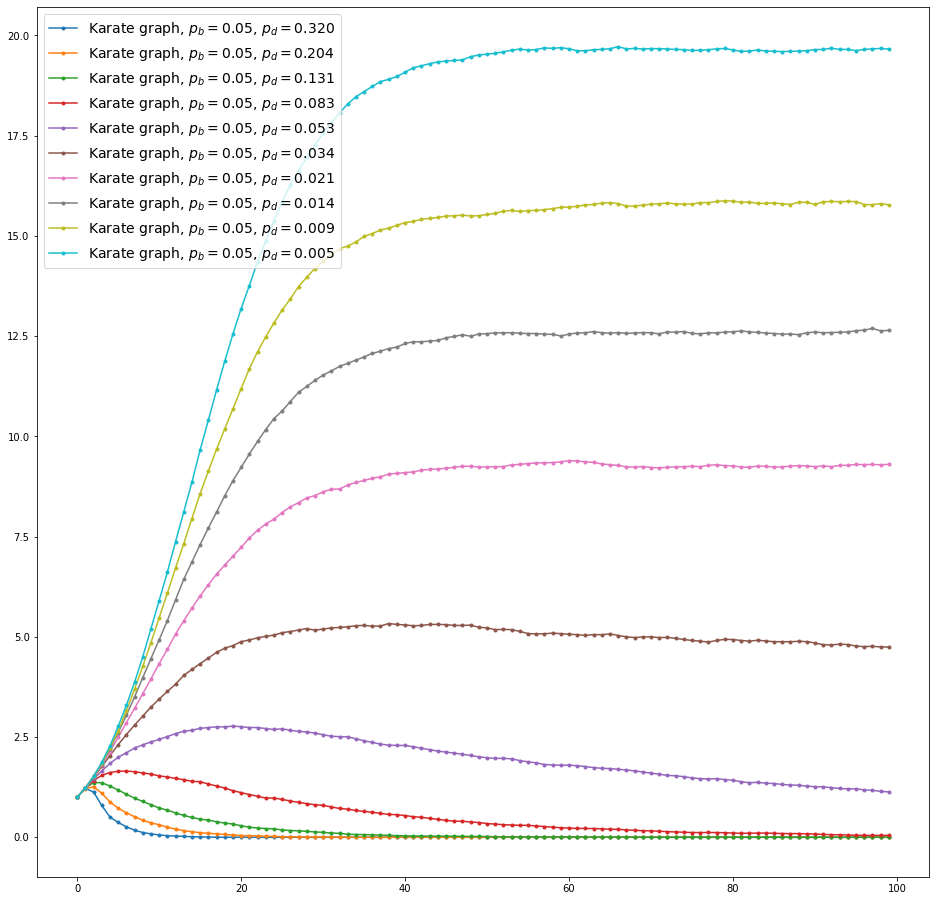

In [40]:
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_means[i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
plt.show()

Note that with the low $p_d$ value, the number of infected nodes reaches an average of around 17 (half of the total nodes) and remains stable.